## Least Squares

In [1]:
import scipy
from scipy import matrix
from scipy import linalg
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
A = matrix([[1, 2], [1,3], [0,0]])
b = matrix([4,5,6]).T

In [4]:
x, error, _, _ = linalg.lstsq(A, b)

In [5]:
x

array([[2.],
       [1.]])

In [6]:
A*np.asmatrix(x)

matrix([[4.],
        [5.],
        [0.]])

In [7]:
error

array([36.])

## Applications

@Solubility Data

Tetko et al. (2001) and Huuskonen (2000) investigated a set of compounds with corresponding experimental solubility values using complex sets of descriptors. They used linear regression and neural network models to estimate the relationship between chemical structure and solubility. For our analyses, we will use 1267 compounds and a set of more understandable descriptors that fall into one of three groups: 208 binary "fingerprints" that indicate the presence or absence of a particular chemical sub-structure, 16 count descriptors (such as the number of bonds or the number of Bromine atoms) and 4 continuous descriptors (such as molecular weight or surface area).

1267 observation (951+316)

228 mixed variables

www.rdocumentation.org/packages/AppliedPredictiveModeling/versions/1.1-6/topics/solubility

In [8]:
import pandas as pd
from sklearn import linear_model

data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv('data/'+i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [9]:
train_data = data["solTrainX"]
train_label = data["solTrainY"]
test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns

train data :  (951, 228)
train label :  (951, 1)
test data :  (316, 228)
test label :  (316, 1)


In [10]:
data["solTestX"].head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
20,1,0,0,1,0,0,0,0,1,1,...,2,0,2,0,1,1,0,0.492,37.30,37.30
21,1,0,1,1,0,1,0,0,0,0,...,3,1,2,0,0,0,0,1.317,52.32,52.32
23,0,1,0,0,1,0,0,0,0,1,...,6,0,2,0,0,0,1,0.846,40.46,40.46
25,0,0,1,0,0,1,0,0,0,0,...,5,2,0,0,0,0,1,0.984,24.06,24.06
28,1,1,0,1,1,1,0,1,0,0,...,6,2,1,0,0,0,1,0.843,55.98,55.98


In [11]:
data["solTestY"].head()

,x
1,0.93
2,0.85
3,0.81
4,0.74
5,0.61


In [12]:
model = linear_model.LinearRegression()
model.fit(train_data, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
predict_label = model.predict(test_data)

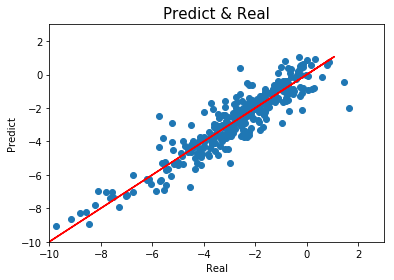

In [14]:
plt.scatter(predict_label, test_label.values)

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Real')
plt.ylabel('Predict')

plt.xlim(-10, 3) 
plt.ylim(-10, 3)

plt.plot(test_label, test_label, 'r-') 
plt.show()

In [15]:
from sklearn import metrics
print("R2 Score = ", metrics.r2_score(predict_label, test_label))

R2 Score =  0.8428929986737118


In [16]:
model.coef_

array([[ 2.24422051e-01,  9.83835590e-02, -1.10914289e-01,
        -4.51043537e-01, -4.34503904e-01,  6.78606656e-02,
        -7.58829641e-02,  2.89075863e-02, -5.78845948e-01,
         6.62929967e-01,  1.39591879e-01, -1.15882339e-01,
        -4.66517389e-01,  4.91770844e-01, -3.87770662e-01,
         7.07683457e-02, -1.73261169e-01, -4.83378081e-01,
         1.13616157e-01, -1.04170450e-02,  1.07902562e-01,
        -4.26794425e-02, -4.70003096e-01, -5.59100603e-01,
         2.63917856e-01,  3.39578473e-01,  2.19598087e-03,
         5.89679597e-02, -5.50348526e-02, -1.84335837e-01,
         2.31161707e-01, -1.34062929e+00,  8.93166762e-01,
        -3.77326320e-01, -1.72037178e-01, -2.11862729e-02,
         6.75814952e-02,  2.45347927e-01, -2.07210916e-01,
         6.23318292e-01, -2.60751915e-01, -8.14809783e-02,
         5.39784834e-01, -4.21411095e-01,  1.16034868e-01,
        -1.61216901e-01,  6.37574911e-02,  3.35788138e-01,
         4.83891084e-03, -1.40944614e-01,  2.78467640e-0

In [17]:
model.intercept_

array([3.50829021e+09])

In [18]:
col_x = train_data.columns
col_y = train_label.columns
formul = ""
for i in range(0, len(model.coef_.reshape(-1))) :
    if model.coef_.reshape(-1)[i] != 0 :
        formul += str(model.coef_.reshape(-1)[i]) + " * " + col_x[i] + " + "

print("Formula : \n")
print(col_y[0], " = ", formul[:-3], '+', model.intercept_[0])

Formula : 

x  =  0.22442205096229162 * FP001 + 0.09838355904662367 * FP002 + -0.11091428889717286 * FP003 + -0.4510435371908177 * FP004 + -0.43450390399660466 * FP005 + 0.06786066561744264 * FP006 + -0.07588296405969182 * FP007 + 0.02890758628950664 * FP008 + -0.578845947879788 * FP009 + 0.6629299670801742 * FP010 + 0.13959187940418566 * FP011 + -0.11588233867224648 * FP012 + -0.4665173891394531 * FP013 + 0.4917708442700449 * FP014 + -0.3877706620072295 * FP015 + 0.07076834574342032 * FP016 + -0.17326116853965182 * FP017 + -0.4833780810859796 * FP018 + 0.11361615748743974 * FP019 + -0.010417045034109264 * FP020 + 0.10790256217367308 * FP021 + -0.042679442512563906 * FP022 + -0.470003095967266 * FP023 + -0.5591006031560207 * FP024 + 0.2639178555139403 * FP025 + 0.33957847253904355 * FP026 + 0.0021959808704523492 * FP027 + 0.05896795970780942 * FP028 + -0.05503485264362069 * FP029 + -0.184335836529696 * FP030 + 0.2311617072855683 * FP031 + -1.3406292910558815 * FP032 + 0.893166761868270

## KNN & Linear Regression

https://github.com/songsuoyuan/The-Element-of-Statistical-Learning-Python-Implements

In [19]:
import numpy as np
from sklearn import linear_model
from sklearn import neighbors
from scipy.stats import multivariate_normal

In [20]:
data = np.loadtxt('./data/mixture_simulation_data.txt', skiprows=1)
means = np.loadtxt('./data/means.txt')
X = data[:,:2]
y = data[:,2]

In [21]:
def linear_regression(X, y):
    '''
    Linear regression model:
        y = w_0 + w_1 * x_1 + ... + w_p * x_p
        coef_ = (w_1, ..., w_p), intercept_ = w_0
    Solution:
        solve min |X_ * w - y|^2 
    where X_ = [ones, X]
    Complexity: O(np^2), based on SVD
    '''
    
    clf = linear_model.LinearRegression()
    clf.fit(X, y)
    
    line = lambda x: ((.5 - clf.intercept_ - clf.coef_[0] * x) / clf.coef_[1])
    line_x = [min(X[:,0])-.2, max(X[:,0]+.5)]
    line_y = list(map(line, line_x))
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.6)
    plt.plot(line_x, line_y, color='b', alpha=.8, linewidth=3)
    plt.xlim([-3,5])
    plt.ylim([-3,5])
    plt.show()
    
    print('(beta_0) = ' + str(clf.intercept_))
    print('(beta_1, beta_2) = ' + str(clf.coef_))
    print('Precision:', 100. * sum(list(map(round,clf.predict(X))) == y) / len(y))

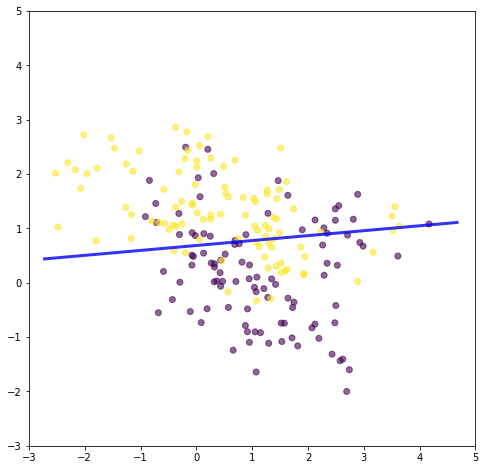

(beta_0) = 0.32906140215553187
(beta_1, beta_2) = [-0.022636    0.24959834]
Precision: 73.0


In [22]:
linear_regression(X, y)

In [23]:
def k_nearest_neighbor(X, y, k):
    '''
    K nearest neighbor method:
        y(x) = 1 / k * (y_1 + ... + y_k)
    where y_i belongs to the k closest points to the point x
    Complexity: based on implement, brute force is O(Dn^2)
    '''
    clf = neighbors.KNeighborsRegressor(n_neighbors=k)
    clf.fit(X, y)
    
    delta = .1
    grid_x = np.arange(min(X[:,0])-.5, max(X[:,0])+.5, delta)
    grid_y = np.arange(min(X[:,1])-.5, max(X[:,1])+.5, delta)
    grid_X, grid_Y = np.meshgrid(grid_x, grid_x)
    combine_XY = np.dstack((grid_X,grid_Y)).reshape(grid_X.size,2)
    Z = clf.predict(combine_XY)
    grid_Z = Z.reshape(grid_X.shape)
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.6)
    plt.contour(grid_X, grid_Y, grid_Z, 1, alpha=.8,
                colors='b', linewidths=3)
    plt.show()
    
    print('Precision:', 100. * sum(list(map(round, clf.predict(X))) == y) / len(y))

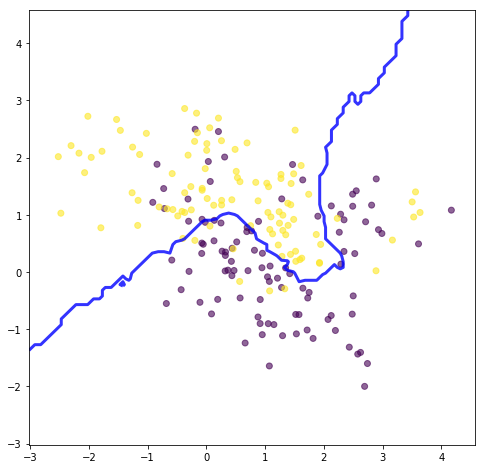

Precision: 84.5


In [24]:
k_nearest_neighbor(X, y, 15)

In [25]:
def optimal_bayes(X, y, means):
    '''
    First 10 means m_k are generated from bivariate Gaussian 
    N([0,1],I) and labeled as RED, another 10 means are generated
    from N([1,0],I) and labeled as BLUE. Then 100 RED observations 
    are generated by first pick an m_k at random with p=0.1, then
    generate observation by N(m_k,I/5). Another 100 BLUE 
    observations are generated by the same procedure.
    Optimal Bayes decision attribute G(x) = k-th class where
    P(Y in k-th class | X = x) is the maximum.
    Estimated runtime = 25s
    '''
    
    delta = .1
    grid_x = np.arange(min(X[:,0])-.5, max(X[:,0])+.5, delta)
    grid_y = np.arange(min(X[:,1])-.5, max(X[:,1])+.5, delta)
    grid_X, grid_Y = np.meshgrid(grid_x, grid_x)
    combine_XY = np.dstack((grid_X,grid_Y)).reshape(grid_X.size,2)
    Z = []
    
    for p in combine_XY:
        dist_B = .0
        dist_R = .0
        covar  = [[0.2,0],[0,0.2]]
        for m in means[:10,:]:
            dist_B += multivariate_normal.pdf(p, mean=m, cov=covar)
        for m in means[10:,:]:
            dist_R += multivariate_normal.pdf(p, mean=m, cov=covar)
        Z.append(np.exp(np.log(dist_B) - np.log(dist_R)) - 1.)
    Z = np.array(Z)
    grid_Z = Z.reshape(grid_X.shape)
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.6)
    plt.scatter(means[:10,0], means[:10,1], s=80, color='blue')
    plt.scatter(means[10:,0], means[10:,1], s=80, color='red')
    plt.contour(grid_X, grid_Y, grid_Z, 1, alpha=.8,
                colors='b', linewidths=3)
    plt.show()
    
    n = len(y)
    predict = []
    for i in range(n):
        dist_B = .0
        dist_R = .0
        covar  = [[0.2,0],[0,0.2]]
        for m in means[:10,:]:
            dist_B += multivariate_normal.pdf(X[i,:], mean=m, 
                                              cov=covar)
        for m in means[10:,:]:
            dist_R += multivariate_normal.pdf(X[i,:], mean=m, 
                                              cov=covar)
        if (dist_B > dist_R):
            predict.append(0)
        else:
            predict.append(1)
            
    print('Precision:', 100. * sum(predict == y) / len(y))

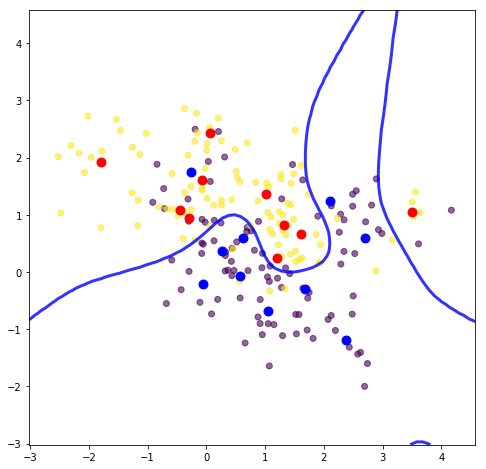

Precision: 85.0


In [26]:
optimal_bayes(X,y,means)